In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel("superstore_sales.xlsx")

In [5]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


# <h3>Basic understanding of the data</h3>

In [4]:
df.shape

(51290, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [6]:
#check the nan values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

# <h4>There do not have any null values in tdataset</h4>

In [7]:
#basic statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
profit,51290.0,28.641740,174.424113,-6599.978,0.000000,9.240,36.8100,8399.976
shipping_cost,51290.0,26.375818,57.296810,0.002,2.610000,7.790,24.4500,933.570
year,51290.0,2012.777208,1.098931,2011.000,2012.000000,2013.000,2014.0000,2014.000


# EDA

# <h2>Objective<h2></br>
<h4>1.What is the overall sales trend?</h4> </br>
</h4>2.What are the top 10 products by sales?</h4></br>
</h4>3.What are the most selling products?</h4></br>
</h4>4.Which is most preffered ship mode?</h4></br>
</h4>5.Which are the most profitable category and sub-category</h4>

# <h4>Ananlysis of every questions:
    1.What is the overall sales trend?

In [8]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [9]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [10]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [11]:
#getting month_year from the dataset
df['year_month']=df['order_date'].apply(lambda x: x.strftime("%Y-%m"))

In [12]:
df['year_month']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: year_month, Length: 51290, dtype: object

In [13]:
df.groupby('year_month')['sales'].sum().reset_index()


,year_month,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


In [14]:
#grouping month year
df_trend=df.groupby('year_month')['sales'].sum().reset_index()

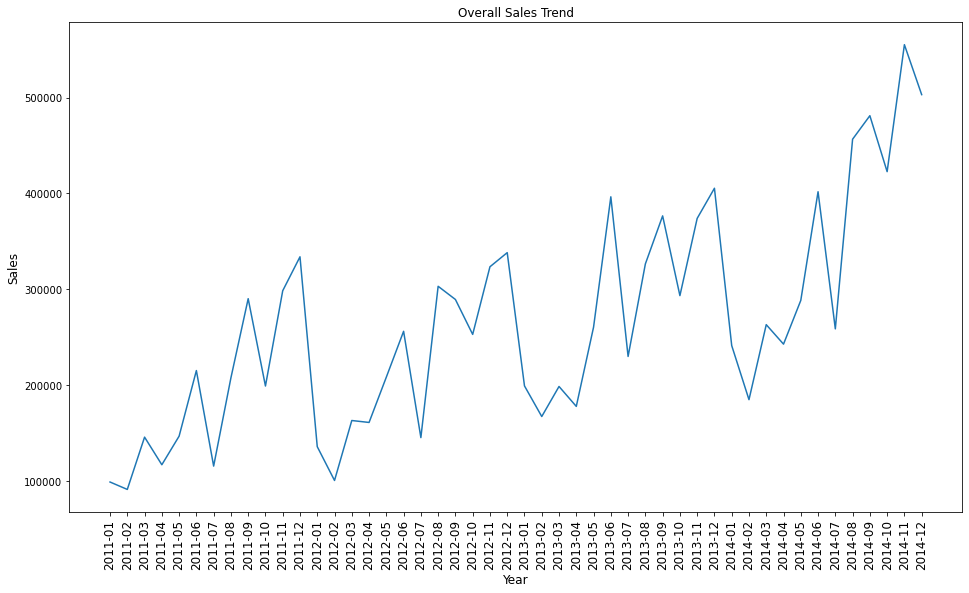

In [15]:
plt.figure(figsize=(16,9))
plt.title("Overall Sales Trend")
plt.plot(df_trend['year_month'],df_trend['sales'])
plt.xticks(rotation='vertical',fontsize=12)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Sales",fontsize=12)
plt.show()

# <h4>2.What are the most selling products?

In [16]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [17]:
prod_sales=df.groupby('product_name').sum()['sales']
prod_sales


product_name
"While you Were Out" Message Book, One Form per Page                                                     25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 41.300
#10 Self-Seal White Envelopes                                                                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 286.672
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     477.660
iOttie HLCRIO102 Car Mount                                                                              215.892
iOttie XL Car Mount                                                                        

In [18]:
prod_sales=pd.DataFrame(df.groupby('product_name').sum()['sales']).reset_index()
prod_sales

,product_name,sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660
3784,iOttie HLCRIO102 Car Mount,215.892
3785,iOttie XL Car Mount,223.888
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554


In [19]:
prod_sales.sort_values(by=['sales'],inplace=True,ascending=False)

In [20]:
top10=prod_sales[:10]

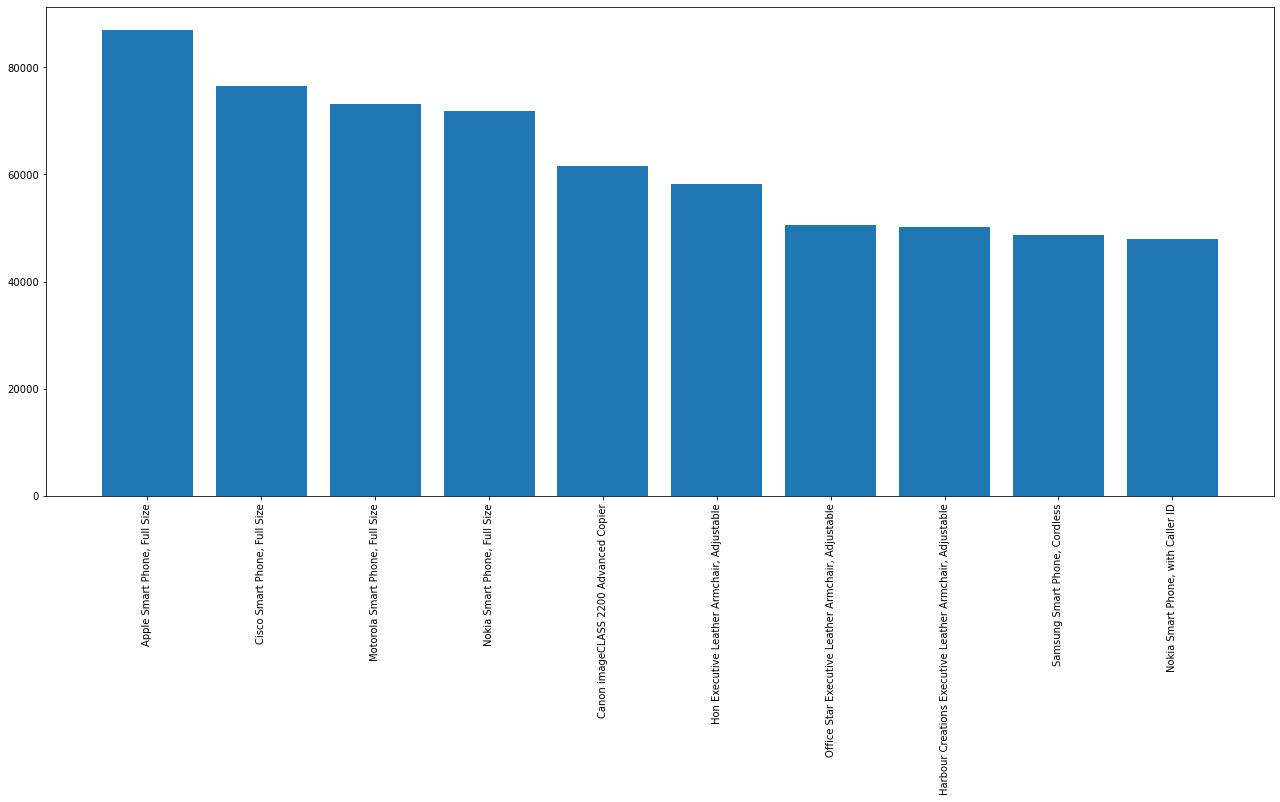

In [21]:
plt.figure(figsize=(22,9))
plt.bar(top10['product_name'],top10['sales'])
plt.xticks(rotation="vertical")
plt.show()

# <h4>3.Which are the most selling products

In [22]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [23]:
df.order_priority.unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

In [24]:
top_sell_prod=pd.DataFrame(df.groupby('product_name')['quantity'].sum())

In [25]:
top_sell_prod.sort_values(by=['quantity'],ascending=False)

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
...,...
Penpower WorldCard Pro Card Scanner,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
Boston 1900 Electric Pencil Sharpener,1


In [26]:
top_sell_prod[:10]

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",21
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",13
#6 3/4 Gummed Flap White Envelopes,9
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",14


# <h4>4.WHAT IS THE MOST PREFERRED SHIP MODE?

In [27]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


<AxesSubplot:xlabel='ship_mode', ylabel='count'>

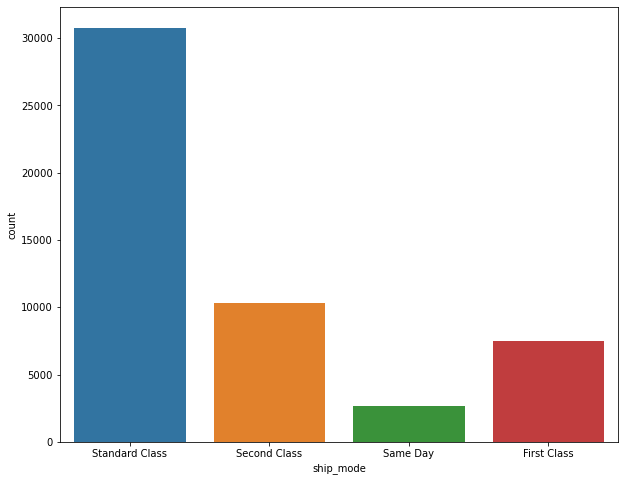

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x='ship_mode',data=df)
#plt.show()

# <h4>5.Which are the most profitable category and sub-category

In [29]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [30]:
#top profitable category
top_profit_category=pd.DataFrame(df.groupby('category')['profit'].sum().reset_index())
top_profit_category=top_profit_category.sort_values(by=['profit'],ascending=False)
top_profit_category

,category,profit
2,Technology,663778.73318
1,Office Supplies,518473.83430
0,Furniture,286782.25380


In [31]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

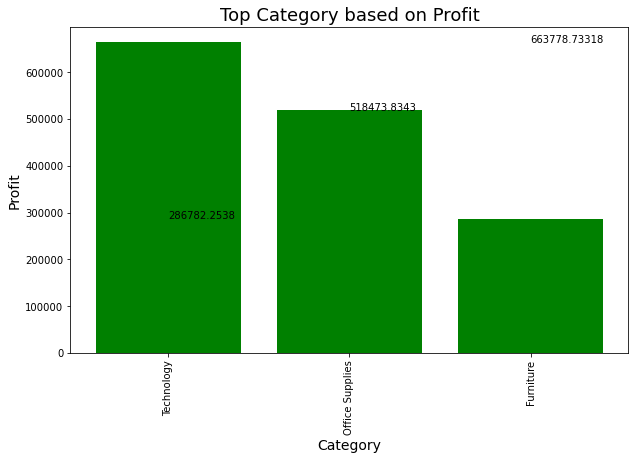

In [32]:
plt.figure(figsize=(10,6))
plt.title("Top Category based on Profit",fontsize=18)
plt.bar(top_profit_category['category'],top_profit_category['profit'],color='green')
plt.xticks(rotation='vertical',fontsize=10)
addlabels(top_profit_category['category'],top_profit_category['profit'])
plt.xlabel("Category",fontsize=14)
plt.ylabel("Profit",fontsize=14)
plt.show()

In [33]:
#top profitable sub-category
top_profit_subcategory=pd.DataFrame(df.groupby('sub_category')['profit'].sum().reset_index())
top_profit_subcategory=top_profit_subcategory.sort_values(by=['profit'],ascending=False)
top_profit_subcategory

,sub_category,profit
6,Copiers,258567.54818
13,Phones,216717.00580
4,Bookcases,161924.41950
5,Chairs,141973.79750
1,Appliances,141680.58940
0,Accessories,129626.30620
14,Storage,108461.48980
3,Binders,72449.84600
12,Paper,59207.68270
11,Machines,58867.87300


In [34]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

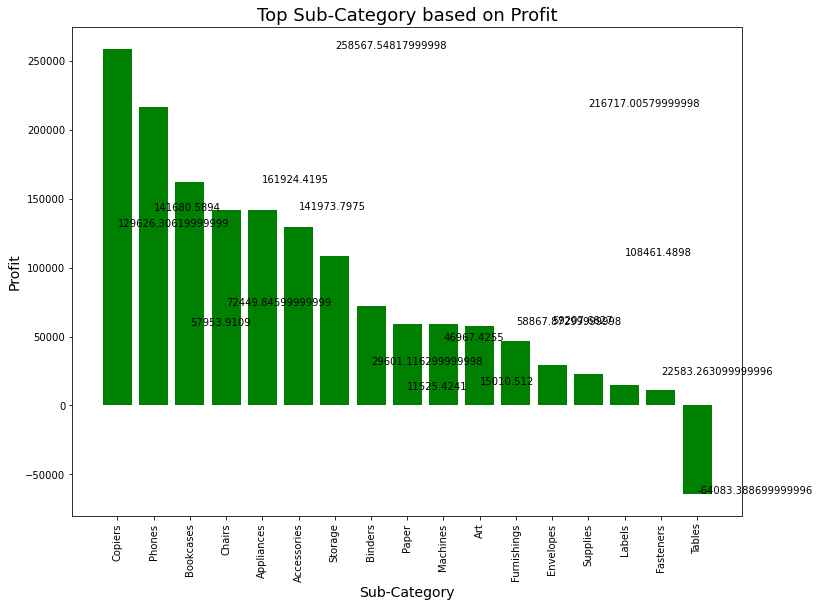

In [35]:

plt.figure(figsize=(12,9))
plt.title("Top Sub-Category based on Profit",fontsize=18)
plt.bar(top_profit_subcategory['sub_category'],top_profit_subcategory['profit'],color='green')
plt.xticks(rotation='vertical',fontsize=10)
addlabels(top_profit_subcategory['sub_category'],top_profit_subcategory['profit'])
plt.xlabel("Sub-Category",fontsize=14)
plt.ylabel("Profit",fontsize=14)
plt.show()

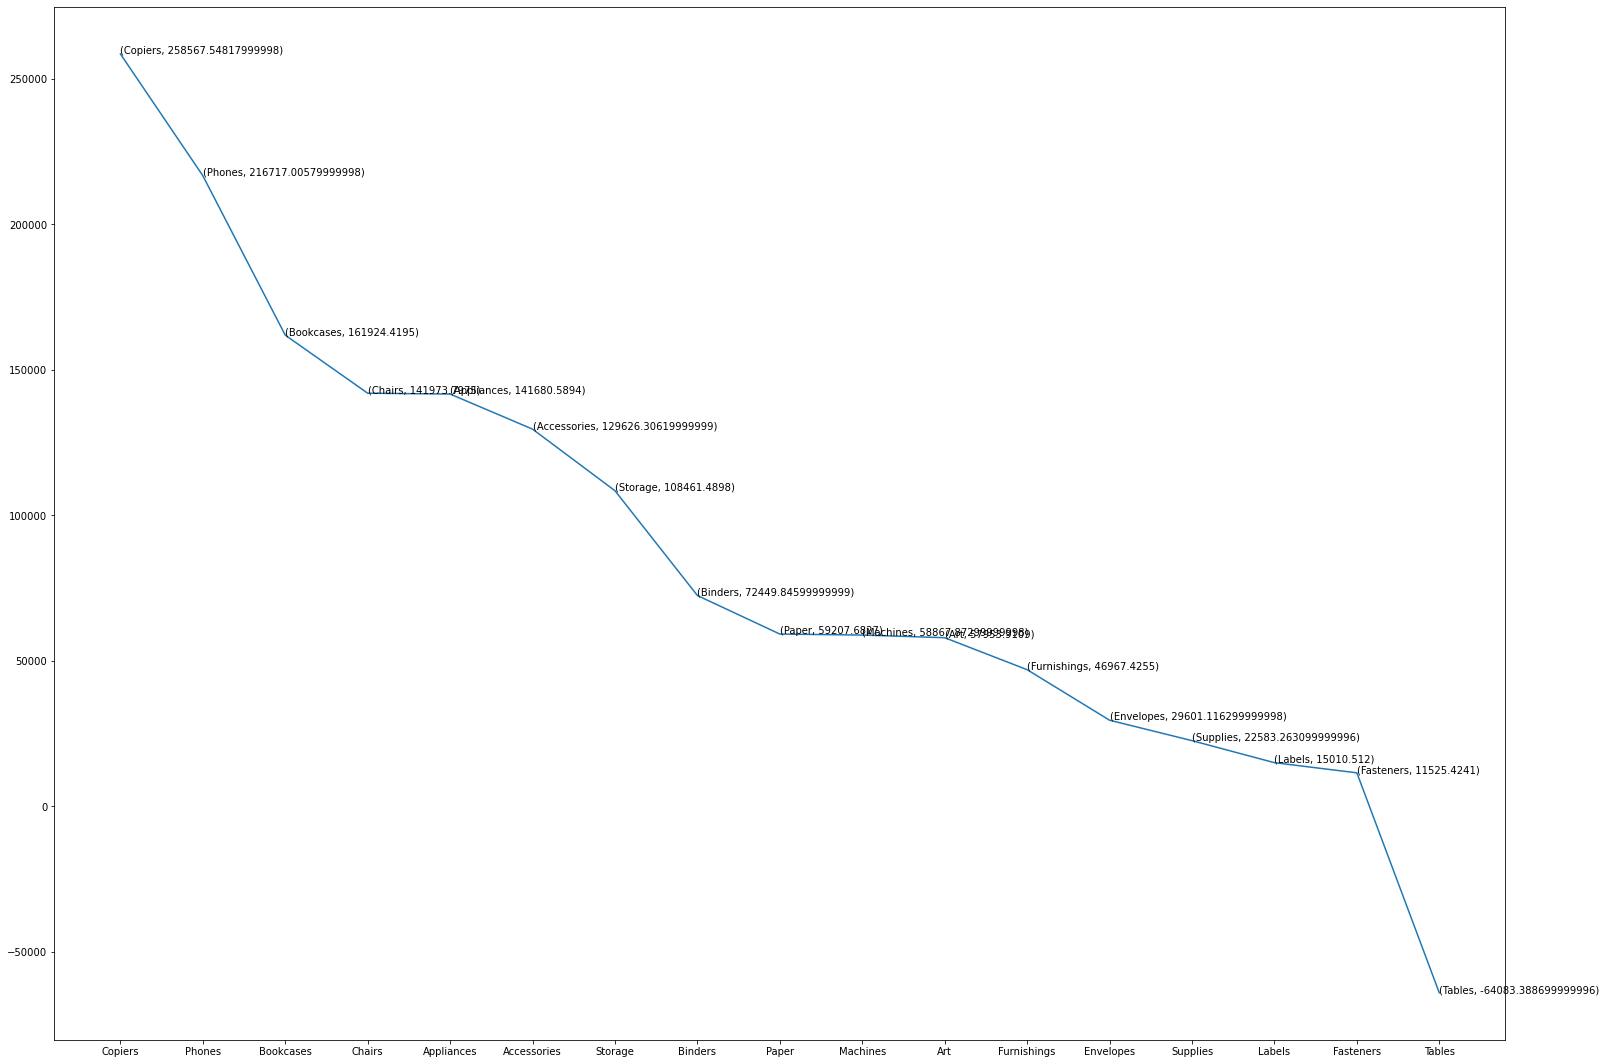

In [36]:
#using line plot
plt.figure(figsize=(26,19))
plt.plot(top_profit_subcategory['sub_category'],top_profit_subcategory['profit'])
for xy in zip(top_profit_subcategory['sub_category'],top_profit_subcategory['profit']):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.show()

In [37]:
#group by category and sub-category based on profit
df.groupby(['category','sub_category'])['profit'].sum().reset_index()

,category,sub_category,profit
0,Furniture,Bookcases,161924.41950
1,Furniture,Chairs,141973.79750
2,Furniture,Furnishings,46967.42550
3,Furniture,Tables,-64083.38870
4,Office Supplies,Appliances,141680.58940
5,Office Supplies,Art,57953.91090
6,Office Supplies,Binders,72449.84600
7,Office Supplies,Envelopes,29601.11630
8,Office Supplies,Fasteners,11525.42410
9,Office Supplies,Labels,15010.51200


# <h4>6.Year wise average sales

In [38]:
#year wise average sales
df_avg_sales=pd.DataFrame(df.groupby('year')['sales'].mean().reset_index())
df_avg_sales

,year,sales
0,2011,251.105901
1,2012,244.247281
2,2013,246.811106
3,2014,245.272139


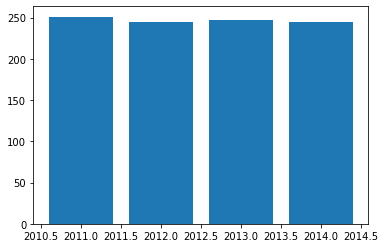

In [39]:
plt.bar(df_avg_sales['year'],df_avg_sales['sales'])
plt.show()

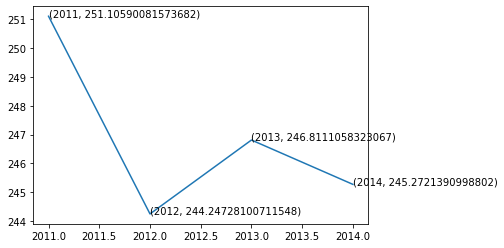

In [40]:
#using line plot
plt.plot(df_avg_sales['year'],df_avg_sales['sales'])
for xy in zip(df_avg_sales['year'],df_avg_sales['sales']):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.show()

In [41]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


# <h4>7.Average shipping cost based on order priority

In [42]:
#based on order priority average shipping cost
df.groupby('order_priority')['shipping_cost'].mean()

order_priority
Critical    59.721245
High        32.871806
Low         27.076355
Medium      18.442320
Name: shipping_cost, dtype: float64

In [43]:
df.segment.unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

# <h4>8.Segment wise average sales

In [44]:
#segment wise average sales 
df_segment_sales=pd.DataFrame(df.groupby('segment')['sales'].mean().reset_index())
df_segment_sales

,segment,sales
0,Consumer,245.416299
1,Corporate,247.890176
2,Home Office,247.228403


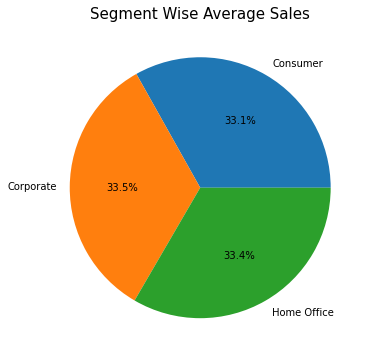

In [45]:
#segment wise average sales percentage
#using pie chart
plt.figure(figsize=(8,6))
plt.title("Segment Wise Average Sales",fontsize=15)
plt.pie(df_segment_sales['sales'],labels=df_segment_sales['segment'],autopct="%0.1f%%")
plt.show()

In [46]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

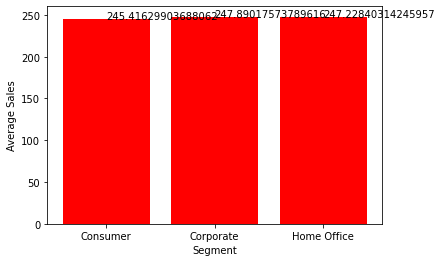

In [47]:
#using bar graph
plt.bar(df_segment_sales['segment'],df_segment_sales['sales'],color='red')
addlabels(df_segment_sales['segment'],df_segment_sales['sales'])
plt.xlabel("Segment")
plt.ylabel("Average Sales")
plt.show()

In [48]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


# <h4>9.Region wise average sells

In [49]:
df['region'].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Canada', 'Southeast Asia',
       'Central', 'South', 'Caribbean', 'North Asia', 'East', 'West',
       'Central Asia'], dtype=object)

In [50]:
region_sales=pd.DataFrame(df.groupby('region')['sales'].mean().reset_index())
region_sales

,region,sales
0,Africa,170.868370
1,Canada,174.292109
2,Caribbean,191.882166
3,Central,253.872674
4,Central Asia,367.591097
5,EMEA,160.302508
6,East,238.336110
7,North,260.849656
8,North Asia,362.835663
9,Oceania,315.510356


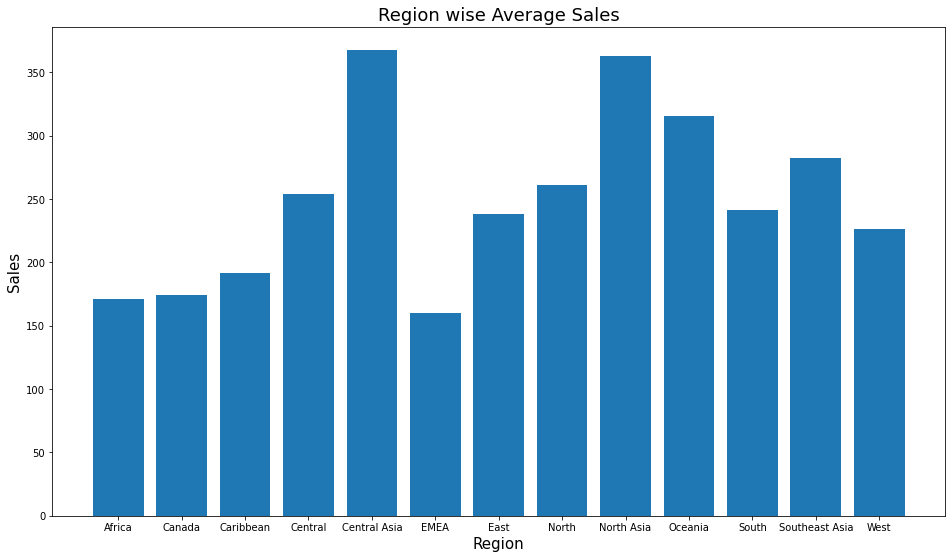

In [51]:
plt.figure(figsize=(16,9))
plt.title("Region wise Average Sales",fontsize=18)
plt.bar(region_sales['region'],region_sales['sales'])
plt.xlabel("Region", fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.show()

# <h4>9.Region wise total profit

In [52]:
region_profit=pd.DataFrame(df.groupby('region')['profit'].sum().reset_index())

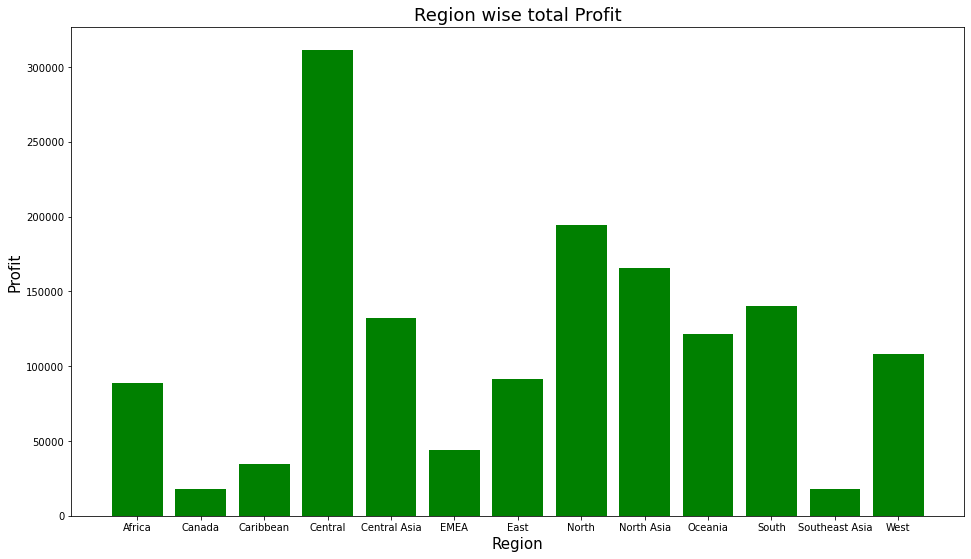

In [53]:
plt.figure(figsize=(16,9))
plt.title("Region wise total Profit",fontsize=18)
plt.bar(region_profit['region'],region_profit['profit'],color="green")
plt.xlabel('Region',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.show()

In [54]:
#same thing using pivot table
pd.pivot_table(data=region_profit,index='region',values='profit', aggfunc='sum').reset_index()

,region,profit
0,Africa,88871.63100
1,Canada,17817.39000
2,Caribbean,34571.32104
3,Central,311403.98164
4,Central Asia,132480.18700
5,EMEA,43897.97100
6,East,91522.78000
7,North,194597.95252
8,North Asia,165578.42100
9,Oceania,121666.64200


In [63]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,2014-12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,2014-12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,2014-12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,2014-12


In [8]:
l=[]
for i in df.index:
    if df['shipping_cost'][i]>30 and df['shipping_cost'][i]<90:
#         print(df['shipping_cost'][i])
        l.append(df['shipping_cost'][i])
print(len(l))

7411


In [22]:
#randomly select any 3 rows from the dataset
df.sample(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
44116,CA-2014-122280,2014-09-11,2014-09-11,Same Day,Shahid Hopkins,Consumer,New York,United States,US,East,...,Office Supplies,Paper,"Rediform S.O.S. 1-Up Phone Message Bk, 4-1/4x3...",18.76,2,0.0,9.0048,4.880,High,2014
1367,MX-2011-167773,2011-04-01,2011-04-05,Standard Class,Lynn Smith,Consumer,Bogota,Colombia,LATAM,South,...,Office Supplies,Binders,"Cardinal Hole Reinforcements, Economy",17.80,5,0.0,0.5000,1.957,High,2011
8780,ES-2011-2272875,2011-12-27,2011-12-30,First Class,Dianna Wilson,Home Office,Vienna,Austria,EU,Central,...,Office Supplies,Binders,"Wilson Jones Binding Machine, Economy",97.92,2,0.0,35.2200,12.310,Medium,2011


In [25]:
#get some percentages of data from the dataset
df.sample(frac=0.3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
34167,ES-2014-5513140,2014-01-16,2014-01-16,Same Day,John Lucas,Consumer,Provence-Alpes-Côte d'Azur,France,EU,Central,...,Office Supplies,Art,"Binney & Smith Pencil Sharpener, Easy-Erase",139.650,5,0.0,15.300,44.600,High,2014
22302,US-2013-160178,2013-04-10,2013-04-12,First Class,Steven Roelle,Home Office,Francisco Morazán,Honduras,LATAM,Central,...,Furniture,Chairs,"SAFCO Chairmat, Set of Two",124.140,5,0.4,-62.160,19.397,High,2013
51021,ES-2014-2434348,2014-12-28,2015-01-04,Standard Class,Brad Eason,Home Office,Provence-Alpes-Côte d'Azur,France,EU,Central,...,Office Supplies,Appliances,"Hoover Blender, White",440.640,5,0.1,-44.160,28.850,Medium,2014
46526,IN-2014-70493,2014-10-23,2014-10-26,Second Class,Tom Zandusky,Corporate,Guangdong,China,APAC,North Asia,...,Furniture,Chairs,"Novimex Bag Chairs, Adjustable",145.350,3,0.0,62.460,42.370,Critical,2014
10280,MX-2012-113502,2012-03-16,2012-03-20,Standard Class,Tamara Chand,Corporate,Minas Gerais,Brazil,LATAM,South,...,Furniture,Chairs,"Harbour Creations Chairmat, Black",231.900,5,0.0,39.400,10.762,Medium,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40335,MX-2014-134740,2014-06-26,2014-06-28,First Class,Elizabeth Moffitt,Corporate,Chimaltenango,Guatemala,LATAM,Central,...,Furniture,Chairs,"Novimex Swivel Stool, Black",216.040,2,0.0,21.600,13.186,Critical,2014
11821,IN-2012-33288,2012-05-22,2012-05-25,Second Class,Pauline Chand,Home Office,Pahang,Malaysia,APAC,Southeast Asia,...,Office Supplies,Storage,"Smead Trays, Blue",145.440,3,0.0,71.190,29.120,High,2012
10043,IT-2012-5774254,2012-03-05,2012-03-10,Standard Class,Jeremy Ellison,Consumer,Scotland,United Kingdom,EU,North,...,Furniture,Furnishings,"Eldon Photo Frame, Erganomic",119.133,3,0.3,6.723,6.420,Medium,2012
47855,MO-2014-340,2014-11-13,2014-11-16,First Class,Kelly Williams,Consumer,Gharb-Chrarda-Béni Hssen,Morocco,Africa,Africa,...,Office Supplies,Binders,"Acco Hole Reinforcements, Recycled",14.040,2,0.0,7.020,1.040,Medium,2014


# For Practice purpose

In [11]:
df['segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [12]:
cat=['Consumer','Corporate']

In [20]:
con=df['segment'].isin(cat).reset_index()

In [21]:
print(df[con])

      order_id order_date ship_date ship_mode customer_name    segment state  \
0          NaN        NaT       NaT       NaN           NaN   Consumer   NaN   
1          NaN        NaT       NaT       NaN           NaN   Consumer   NaN   
2          NaN        NaT       NaT       NaN           NaN   Consumer   NaN   
3          NaN        NaT       NaT       NaN           NaN        NaN   NaN   
4          NaN        NaT       NaT       NaN           NaN   Consumer   NaN   
...        ...        ...       ...       ...           ...        ...   ...   
51285      NaN        NaT       NaT       NaN           NaN  Corporate   NaN   
51286      NaN        NaT       NaT       NaN           NaN   Consumer   NaN   
51287      NaN        NaT       NaT       NaN           NaN   Consumer   NaN   
51288      NaN        NaT       NaT       NaN           NaN   Consumer   NaN   
51289      NaN        NaT       NaT       NaN           NaN   Consumer   NaN   

      country market region  ... catego